In [1]:
import numpy as np
import cv2 
import math
import matplotlib.pyplot as plt


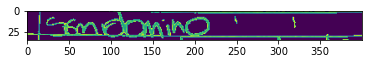

In [55]:

renglon = cv2.imread('1.jpeg', cv2.IMREAD_GRAYSCALE)
img = renglon[250:285,200:600]

lower_blue = np.array(10)
upper_blue = np.array(140)
    
    # Umbral de la imagen HSV para obtener solo colores azules
    # mascara 
    
mask = cv2.inRange(img, lower_blue, upper_blue)
res = cv2.bitwise_and(img,img, mask= mask)

plt.imshow(res)
cv2.imwrite('renglon.jpeg',res)
plt.show()

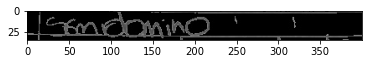

In [39]:
renglon = cv2.imread('renglon.jpeg')

plt.imshow(renglon)

plt.show()

C:\Users\Alucard0\AppData\Local\Temp/ipykernel_3816/859356565.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while np.any(img != last):


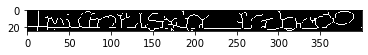

In [64]:
### Esqueletización Opcion 1


import scipy.ndimage.morphology as morp



def skeletonize(img):

    struct =  np.array([
        [[[0, 0, 0], [0, 1, 0], [1, 1, 1]],
         [[1, 1, 1], [0, 0, 0], [0, 0, 0]]],

        [[[0, 0, 0], [1, 1, 0], [0, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [0, 0, 0]]],

        [[[0, 0, 1], [0, 1, 1], [0, 0, 1]],
         [[1, 0, 0], [1, 0, 0], [1, 0, 0]]],

        [[[0, 0, 0], [0, 1, 1], [0, 1, 0]],
         [[1, 1, 0], [1, 0, 0], [0, 0, 0]]],

        [[[1, 1, 1], [0, 1, 0], [0, 0, 0]],
         [[0, 0, 0], [0, 0, 0], [1, 1, 1]]],

        [[[0, 1, 0], [0, 1, 1], [0, 0, 0]],
         [[0, 0, 0], [1, 0, 0], [1, 1, 0]]],

        [[[1, 0, 0], [1, 1, 0], [1, 0, 0]],
         [[0, 0, 1], [0, 0, 1], [0, 0, 1]]],

        [[[0, 1, 0], [1, 1, 0], [0, 0, 0]],
         [[0, 0, 0], [0, 0, 1], [0, 1, 1]]]]
        )


    img = img.copy()
    last = ()
    while np.any(img != last):
        last = img
        for s in struct:
            img = np.logical_and(img, np.logical_not(morp.binary_hit_or_miss(img, *s)))
    return img


img = cv2.imread('renglon2.jpeg',0)
ret, img = cv2.threshold(img, 20, 100, 0)
skel = skeletonize(img)

# Para ver el resultado en matplotlib aplicando además interpolación


skelprint=plt.imshow(skel, cmap="gray", interpolation="nearest")
cv2.imwrite('Skelrenglon.jpeg',np.float32(skel))
plt.show()

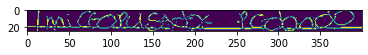

In [73]:
### Esqueletización Opcion 2


img = cv2.imread('renglon2.jpeg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,10,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

plt.imshow(skel)
cv2.imwrite('Skelrenglon2tipo2.jpeg',skel)
plt.show()

In [ ]:
### Proyección vertical................. en proceso...................


void picshadowx (Mat binary)
{
Mat Paintx (Binary.Size (), CV_8UC1, Scalar (255)); // Crear una imagen en blanco completo, usado como pantalla

    int* blackcout = new int[binary.cols];
    memset (blackcout, 0, binary.cols * 4);

    for (int i = 0; i < binary.rows; i++)
    {
        for (int j = 0; j < binary.cols; j++)
        {
            if (binary.at<uchar> (i, j) == 0)
            {
Blackcout [J] ++; // Proyección vertical se proyecta en el eje X
            }
        }
    }
    for (int i = 0; i < binary.cols; i++)
    {
        for (int j = 0; j < blackcout[i]; j++)
        {
Paintx.at <uchar> (binary.rows-1-j, i) = 0; // Flip a la parte inferior, fácil de ver
        }
    }
    delete blackcout;
    imshow ("paintx", paintx);

}
/ / Segmentación paralela de proyección de dirección horizontal
void picshadowy (Mat binary)
{  
/ / Si es blanco o negro de acuerdo con el procesamiento de la imagen binaria.
Mat Painty (Binary.Size (), CV_8UC1, SCALAR (255)); // La inicialización está llena
  
/ / Proyección horizontal
Int * pointcount = nuevo int [binary.rows]; / / // Registre el número de puntos de función en la línea en la imagen binaria
Memset (PointCount, 0, Binary.Rows * 4); // Tenga en cuenta que la inicialización necesita

    for (int i = 0; i < binary.rows; i++)
    {
        for (int j = 0; j < binary.cols; j++)
        {
            if (binary.at<uchar> (i, j) == 0)
            {
PointCount [I] ++; // Registre el número de puntos negros en cada fila / / Proyección horizontal por proyección en el eje y
            }
        }
    }

    for (int i = 0; i < binary.rows; i++)
    {
Para (int j = 0; j <pointcount [i]; j ++) // de acuerdo con el número de puntos negros en cada fila, bucle
        {
            
            painty.at<uchar> (i, j) = 0; 
        }

    }

    imshow ("painty", painty);

    vector<Mat> result;
    int startindex = 0;
    int endindex = 0;
Bool inblock = false; // si está atravesado a la posición de personaje

    for (int i = 0; i < painty.rows; i++)
    {
      
Si (! Inblock && pointcount [i]! = 0) // ingrese un área de caracteres
        {
            inblock = true;
            startindex = i;
            cout << "startindex:" << startindex << endl;
        }
If (inblock && pointcount [i] == 0) // ingrese el área en blanco
        {
            endindex = i;
            inblock = false;
MAT ROI = binario.rowrowrange (StartIndex, EndIndex + 1); // tala de tala desde comenzar hasta el final de la línea final,
            result.push_back (roi);
        }
    }

    for (int i = 0; i < result.size(); i++)
    {
        Mat tmp = result[i];
        imshow ("test"+to_string (i), tmp);
    }
    delete pointcount;

}
int main (int argc, char* argv[])
{
  
      Mat src = cv::imread ("test.jpg");

        if (src.empty())
        {
            cerr << "Problem loading image!!!" << endl;
            return -1;
        }

        imshow("in",src);
      
        Mat gray;

        if (src.channels() == 3)
        {
            cv::cvtColor (src, gray, CV_BGR2GRAY);      
        }
        else
        {
            gray = src;
        }
   

        Mat bw2 = Mat::zeros (gray.size(), CV_8UC1);
        thresholdIntegral (gray, bw2);

        cv::imshow ("binary integral", bw2);
  
        //picshadowx (bw2);
        picshadowy (bw2);
        waitKey (0);
    
    return 0;
}